In [1]:
#pre-requisites
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# load the data
df = pd.read_csv('./Mall_Customers.csv')
df.head(5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### preprocessing the data

In [12]:
# remove CustomerID as its not important
df.drop('CustomerID',axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder

# convert the Gender(categorical data) into numeric 
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

In [13]:
# find the correlation
df.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


#### split the data

In [14]:
# create x
x= df.drop(['Gender','Age'],axis=1)


# create y
y=df['Spending Score (1-100)']

In [15]:
from sklearn.model_selection import train_test_split

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

### Build the model

In [16]:
# model building

from sklearn.tree import DecisionTreeClassifier

# create a model
model = DecisionTreeClassifier()

# train the model
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### model evaluation

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_test)
y_true = y_test

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"accuracy = {accuracy:.2f}")
print(f"precision = {precision:.2f}")
print(f"recall = {recall:.2f}")
print(f"f1 = {f1:.2f}")

accuracy = 0.65
precision = 0.46
recall = 0.48
f1 = 0.47


# tree visualization

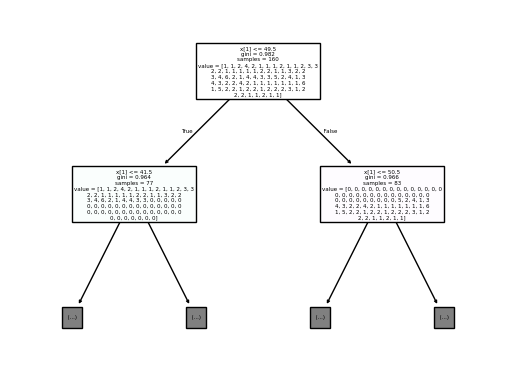

In [21]:
from sklearn.tree import plot_tree
tree = plot_tree(model,max_depth=1,filled=True)